In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv(r"/content/drive/MyDrive/A_doc_imp/A_Udeyme/A_Python_and_Pytorch_for_generative_AI/Pytorch/data/digits/train.csv",dtype = np.float32)
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train.shape

(42000, 785)

In [ ]:
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization
targets_numpy
features_numpy
targets_numpy


array([1., 0., 1., ..., 7., 6., 9.], dtype=float32)

In [ ]:
# Prepare Dataset
# load data
train = pd.read_csv(r"/content/drive/MyDrive/A_doc_imp/A_Udeyme/A_Python_and_Pytorch_for_generative_AI/Pytorch/data/digits/train.csv",dtype = np.float32)

# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization

# train test split. Size of train data is 80% and size of test data is 20%.
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42)

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets

In [ ]:
print(len(features_train))
print(len(features_train) / batch_size)
num_epochs = n_iters / (len(features_train) / batch_size)



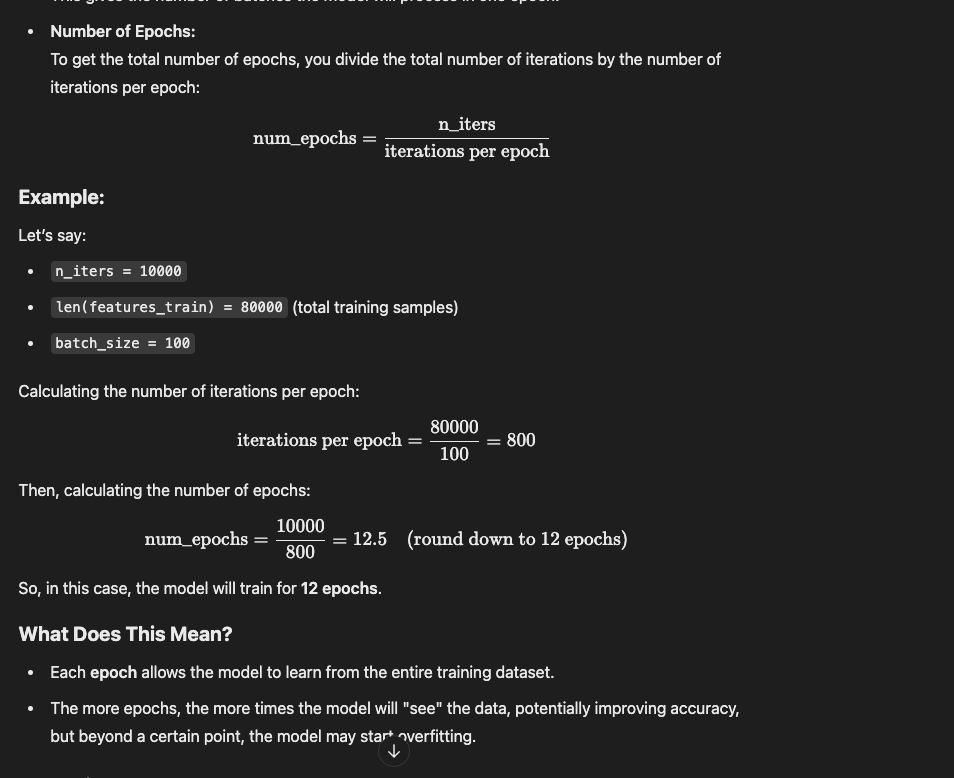

# CNN Pytorch

In [ ]:
#Create a CNN Model
class CNNModel(nn.Module):
  def __init__(self):
    super(CNNModel,self).__init__()

    #Convolution 1
    self.cnn1=nn.Conv2d(in_channels=1,out_channels=16,kernel_size=5,stride=1,padding=0)
    self.relu1=nn.ReLU()

    #max pool 1
    self.maxpool1=nn.MaxPool2d(kernel_size=2)

    #convoultion 2
    self.cnn2=nn.Conv2d(in_channels=16,out_channels=32,kernel_size=5,stride=1,padding=0)
    self.relu2=nn.ReLU()

    #max pool 2
    self.maxpool2=nn.MaxPool2d(kernel_size=2)

    #full connected layer
    self.fc1=nn.Linear(32*4*4,10)#32*4*4=512

  def forward(self,x):
    #convolution 1

    out=self.cnn1(x)
    out=self.relu1(out)

    #max pool1

    out=self.maxpool1(out)

    # convolution 2

    out=self.cnn2(out)
    out=self.relu2(out)

    #max pooling 2

    out=self.maxpool2(out)

    #flatten
    out=out.view(out.size(0),-1)

    #linear function

    out=self.fc1(out)

    return out


#Pytorch train and test set

train=torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test=torch.utils.data.TensorDataset(featuresTest,targetsTest)

#Data loader

train_loader=torch.utils.data.DataLoader(train,batch_size=batch_size,shuffle=False)

test_loader=torch.utils.data.DataLoader(test,batch_size=batch_size,shuffle=False)

#Create CNN

model=CNNModel()

#cross entropy loss

error=nn.CrossEntropyLoss()

#SGD Optimizer

learning_rate=0.1
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)


In [ ]:
num_epochs

7

In [ ]:
# CNN model training

loss_list=[]
iteration_list=[]
accuracy_list=[]
count=0
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    train=Variable(images.view(100,1,28,28))
    labels=Variable(labels)

    #clear gradient
    optimizer.zero_grad()

    # forward propagation

    outputs=model(train)

    #calculate softmax and cross entropy loss

    loss=error(outputs,labels)

    #calculate gradient
    loss.backward()

    #update parameters

    optimizer.step()

    count+=1

    if count%50==0:
      # calculate accuracy
      correct=0
      total=0

      for images,labels in test_loader:
        test=Variable(images.view(100,1,28,28))

        #forward propogation
        outputs=model(test)

        # get prediction from the maximum value

        predicted=torch.max(outputs.data,1)[1]

        #total number of labels
        total+=len(labels)

        correct+=(predicted==labels).sum()
      accuracy=100*correct/float(total)
      #store loss and iteration
      loss_list.append(loss.data)
      iteration_list.append(count)
      accuracy_list.append(accuracy)
    if count%500==0:
      #print loss
      print('Iteration :{} Loss:{} Accuracy: {} %'.format(count,loss.data,accuracy))


Iteration :500 Loss:0.05385993793606758 Accuracy: 97.79762268066406 %
Iteration :1000 Loss:0.04231875762343407 Accuracy: 98.02381134033203 %
Iteration :1500 Loss:0.03731343522667885 Accuracy: 97.94047546386719 %
Iteration :2000 Loss:0.011977101676166058 Accuracy: 98.4047622680664 %


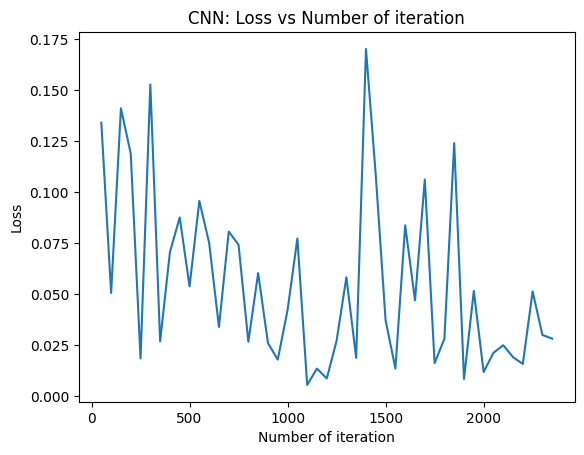

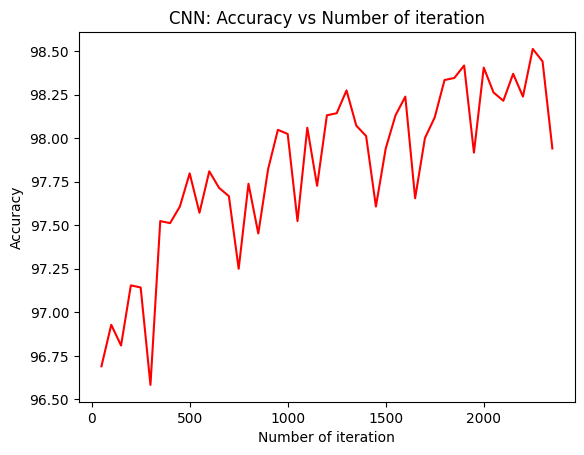

In [ ]:
# visualization loss
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

In [ ]:
1